                                  Null Count
Feature                                     
MINIMUM_PAYMENTS                         313
CREDIT_LIMIT                               1
TENURE                                     0
PURCHASES_FREQUENCY                        0
BALANCE                                    0
BALANCE_FREQUENCY                          0
PURCHASES                                  0
ONEOFF_PURCHASES                           0
INSTALLMENTS_PURCHASES                     0
CASH_ADVANCE                               0
ONEOFF_PURCHASES_FREQUENCY                 0
PRC_FULL_PAYMENT                           0
PURCHASES_INSTALLMENTS_FREQUENCY           0
CASH_ADVANCE_FREQUENCY                     0
CASH_ADVANCE_TRX                           0
PURCHASES_TRX                              0
PAYMENTS                                   0
CUST_ID                                    0
                                  Null Count
Feature                                     
TENURE    

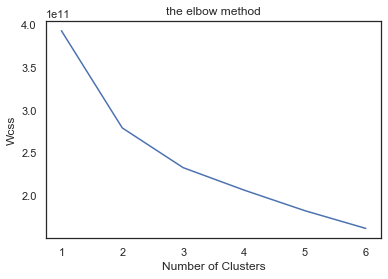

score_one 0.4665817663769782
score after scaling 0.2672161762428284
score after pca+kmeans 0.572000315900709
score after scaling+pca+kmeans 0.45314671229583564


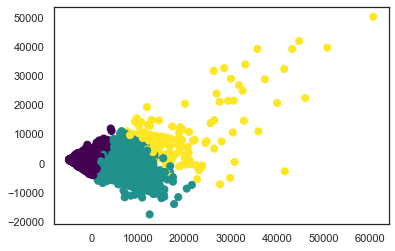

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv('CC.csv')


#QUESTION-1
#PART-1
#Handling NULL Values
nulls = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False))
nulls.columns  = ['Null Count']
nulls.index.name  = 'Feature'
print(nulls)


#Removing nulls
dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS'].mean(), inplace=True)
dataset['CREDIT_LIMIT'].fillna(dataset['CREDIT_LIMIT'].mean(), inplace=True)
nullsnew = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False))
nullsnew.columns  = ['Null Count']
nullsnew.index.name  = 'Feature'
print(nullsnew)

#PART-2
x = dataset.iloc[:,1:-1]

#QUESTION-1

#elbow method
wcss = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i,max_iter=300,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
#print(wcss)
plt.plot(range(1,7),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

#QUESTION-2

##building the model

km = KMeans(n_clusters=3)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans= km.predict(x)
from sklearn import metrics

# calculating the score
score = metrics.silhouette_score(x, y_cluster_kmeans)
print("score_one",score)

#QUESTION-3

#scaling

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x)
x_scaler=scaler.transform(x)

#applying kmeans
nclusters = 3
seed = 0
km = KMeans(n_clusters=3)
km.fit(x_scaler)
y_cluster_kmeansscale = km.predict(x_scaler)

# calculating the score
scorenew = metrics.silhouette_score(x_scaler, y_cluster_kmeansscale)
print("score after scaling",scorenew)

#QUESTION-4

# applying PCA


pca = PCA(2)
x_pca = pca.fit_transform(x)

#scaled data is x_scaler
#applying pca on x-scaler

pca = PCA(2)
x_pca_scaler = pca.fit_transform(x_scaler)



#BONUS QUESTION-1

#PCA+KMEANS

##building the model
km = KMeans(n_clusters=3)
km.fit(x_pca)
# predict the cluster for each data point
y_cluster_kmeanspca= km.predict(x_pca)
from sklearn import metrics

pcameansscore = metrics.silhouette_score(x_pca, y_cluster_kmeanspca)
print("score after pca+kmeans",pcameansscore)

#2 SCALING+PCA+KMEANS

##building the model
km = KMeans(n_clusters=3)
km.fit(x_pca_scaler)
# predict the cluster for each data point
y_cluster_kmeansscaler= km.predict(x_pca_scaler)
from sklearn import metrics

pcascalmeascore = metrics.silhouette_score(x_pca_scaler, y_cluster_kmeansscaler)
print("score after scaling+pca+kmeans",pcascalmeascore)

#BONUS QUESTION-2
# plot for pca+kmeans
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_cluster_kmeans, s=50, cmap='viridis')
plt.show()

# plot for SCALING+PCA+KMEANS
# plt.scatter(x_pca_scaler[:, 0], x_pca_scaler[:, 1], c=y_cluster_kmeans, s=50, cmap='viridis')

# plt.show()